In [2]:
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator

In [3]:
market = Market(market_data_generator=MarketDataGenerator())

# first we can do it by defining all the vendor fields, tickers etc. so we bypass the configuration file
md_request = MarketDataRequest( start_date='14 Jun 2016',
                                finish_date='20 Jun 2016',
                                fields=['bid', 'ask'], 
                                vendor_fields=['bid', 'ask'],
                                freq='tick', 
                                data_source='dukascopy',
                                tickers=['EURUSD'],
                                vendor_tickers=['EURUSD'])

df = market.fetch_market(md_request)
print(df.tail(n=10))

Couldn't push MarketDataRequest_858__abstract_curve_key-None__base_depos_currencies-EUR_GBP_AUD_NZD_USD_CAD_CHF_NOK_SEK_JPY__base_depos_tenor-ON_TN_SN_1W_2W_3W_1M_... to Redis: Error 61 connecting to 127.0.0.1:6379. Connection refused.


                                  EURUSD.bid  EURUSD.ask
Date                                                    
2016-06-19 23:59:48.959000+00:00     1.13471     1.13476
2016-06-19 23:59:51.179000+00:00     1.13471     1.13476
2016-06-19 23:59:53.703000+00:00     1.13471     1.13476
2016-06-19 23:59:54.226000+00:00     1.13470     1.13476
2016-06-19 23:59:54.813000+00:00     1.13471     1.13476
2016-06-19 23:59:55.321000+00:00     1.13470     1.13476
2016-06-19 23:59:55.834000+00:00     1.13471     1.13476
2016-06-19 23:59:58.713000+00:00     1.13470     1.13476
2016-06-19 23:59:59.228000+00:00     1.13470     1.13475
2016-06-19 23:59:59.746000+00:00     1.13469     1.13474


In [4]:
df['EURUSD.mid'] = (df['EURUSD.ask'] + df['EURUSD.bid']) / 2.0

In [19]:
def get_tick_data(start_date,finish_date):
    market = Market(market_data_generator=MarketDataGenerator())

    # first we can do it by defining all the vendor fields, tickers etc. so we bypass the configuration file
    md_request = MarketDataRequest( start_date=start_date,
                                finish_date=finish_date,
                                fields=['bid', 'ask'], 
                                vendor_fields=['bid', 'ask'],
                                freq='tick', 
                                data_source='dukascopy',
                                tickers=['EURUSD'],
                                vendor_tickers=['EURUSD'])
    df = market.fetch_market(md_request)
    df['EURUSD.mid'] = (df['EURUSD.ask'] + df['EURUSD.bid']) / 2.0
    return df

In [4]:
tick_data = get_tick_data('14 Jun 2016','20 Jun 2016')

Couldn't push MarketDataRequest_858__abstract_curve_key-None__base_depos_currencies-EUR_GBP_AUD_NZD_USD_CAD_CHF_NOK_SEK_JPY__base_depos_tenor-ON_TN_SN_1W_2W_3W_1M_... to Redis: Error 61 connecting to 127.0.0.1:6379. Connection refused.


In [20]:
import pandas as pd

def tick_to_ohlc(tick_df: pd.DataFrame, timeframe: str) -> pd.DataFrame:
    '''
    Convert tick data to OHLC data.
    1 min = 1T
    1 Hr = 1H
    1 Day = 1D
    '''
    # Assuming the DataFrame is indexed by timestamp and has a 'Mid' column
    # for the mid prices. Adapt as necessary.

    # Resample the tick data to OHLC data using the specified timeframe
    ohlc_df = tick_df['EURUSD.mid'].resample(timeframe).ohlc()
    
    # Drop rows where all values are NaN (which may happen in less active trading periods)
    ohlc_df.dropna(how='all', inplace=True)
    
    return ohlc_df

In [16]:
ohlc_df = tick_to_ohlc(tick_data, '1h')  # '1T' denotes 1-minute bars
print(ohlc_df)

                               open      high       low     close
Date                                                             
2016-06-14 00:00:00+00:00  1.128795  1.129545  1.128555  1.129535
2016-06-14 01:00:00+00:00  1.129535  1.129865  1.129365  1.129490
2016-06-14 02:00:00+00:00  1.129490  1.129740  1.129080  1.129740
2016-06-14 03:00:00+00:00  1.129735  1.129765  1.129185  1.129365
2016-06-14 04:00:00+00:00  1.129370  1.129495  1.128560  1.128810
...                             ...       ...       ...       ...
2016-06-17 19:00:00+00:00  1.127260  1.128355  1.127105  1.127910
2016-06-17 20:00:00+00:00  1.127900  1.127995  1.127300  1.127625
2016-06-19 21:00:00+00:00  1.133275  1.133705  1.131635  1.131825
2016-06-19 22:00:00+00:00  1.131905  1.132380  1.130920  1.132305
2016-06-19 23:00:00+00:00  1.132295  1.135820  1.132295  1.134715

[96 rows x 4 columns]


In [27]:
import matplotlib.pyplot as plt
import mplfinance as mpf 
import pickle

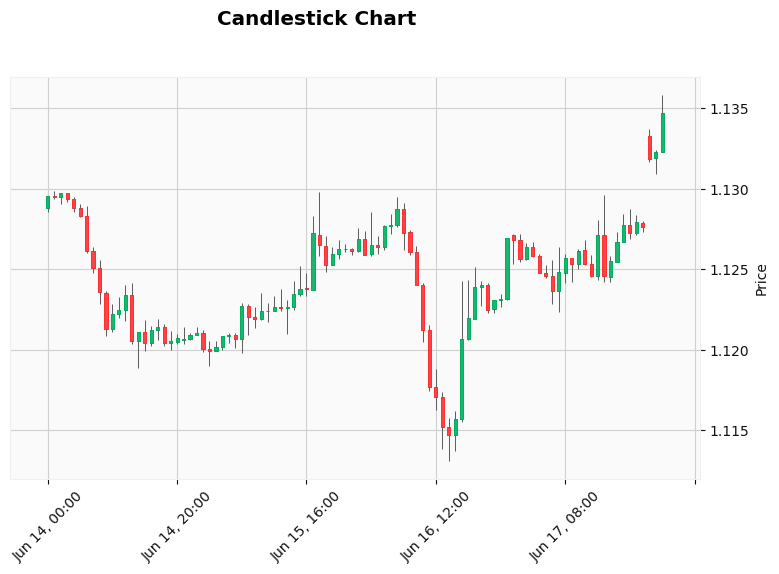

In [17]:
# Create a candlestick chart using mplfinance
mpf.plot(ohlc_df, type='candle', style='yahoo', title='Candlestick Chart', ylabel='Price', figratio=(10, 6))
plt.show()

In [22]:
def get_candlestick_data(start_date,finish_date,timeframe: str):
    '''get candlestick data from start_date to finish_date with timeframe
    date format: 'dd mmm yyyy' like '14 Jun 2016'
    timeframe format:
    1 min = 1T
    1 Hr = 1H
    1 Day = 1D
    '''
    tick_data = get_tick_data(start_date,finish_date)
    ohlc_df = tick_to_ohlc(tick_data, timeframe)
    return ohlc_df,tick_data

In [23]:
df,data = get_candlestick_data('1 Jan 2022','31 Dec 2022','15T')

Couldn't push MarketDataRequest_858__abstract_curve_key-None__base_depos_currencies-EUR_GBP_AUD_NZD_USD_CAD_CHF_NOK_SEK_JPY__base_depos_tenor-ON_TN_SN_1W_2W_3W_1M_... to Redis: Error 61 connecting to 127.0.0.1:6379. Connection refused.


In [36]:
df.to_pickle('EURUSD_tick_2022.pkl')

OSError: [Errno 30] Read-only file system: 'EURUSD_tick_2022.pkl'

# Tasks
test function for stability while procuring larger datasets 
ignore the market close times 